In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('Clean_Telco_Customer_Churn.csv')
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [4]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2281.916928
std,0.368612,24.559481,30.090047,2265.270398
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,402.225000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

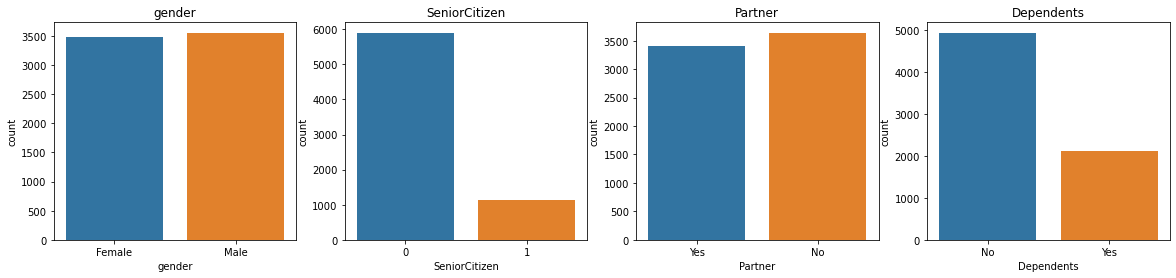

In [9]:
cols = ['gender','SeniorCitizen',"Partner","Dependents"]
numerical = cols

plt.figure(figsize=(20,4))

for i, col in enumerate(numerical):
    ax = plt.subplot(1, len(numerical), i+1)
    sns.countplot(x=str(col), data=df)
    ax.set_title(f"{col}")

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

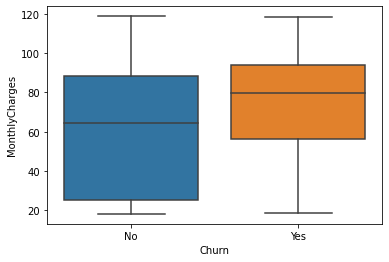

In [10]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

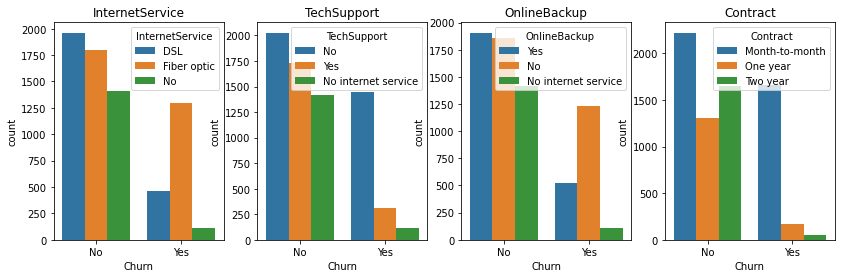

In [11]:
cols = ['InternetService',"TechSupport","OnlineBackup","Contract"]

plt.figure(figsize=(14,4))

for i, col in enumerate(cols):
    ax = plt.subplot(1, len(cols), i+1)
    sns.countplot(x ="Churn", hue = str(col), data = df)
    ax.set_title(f"{col}")

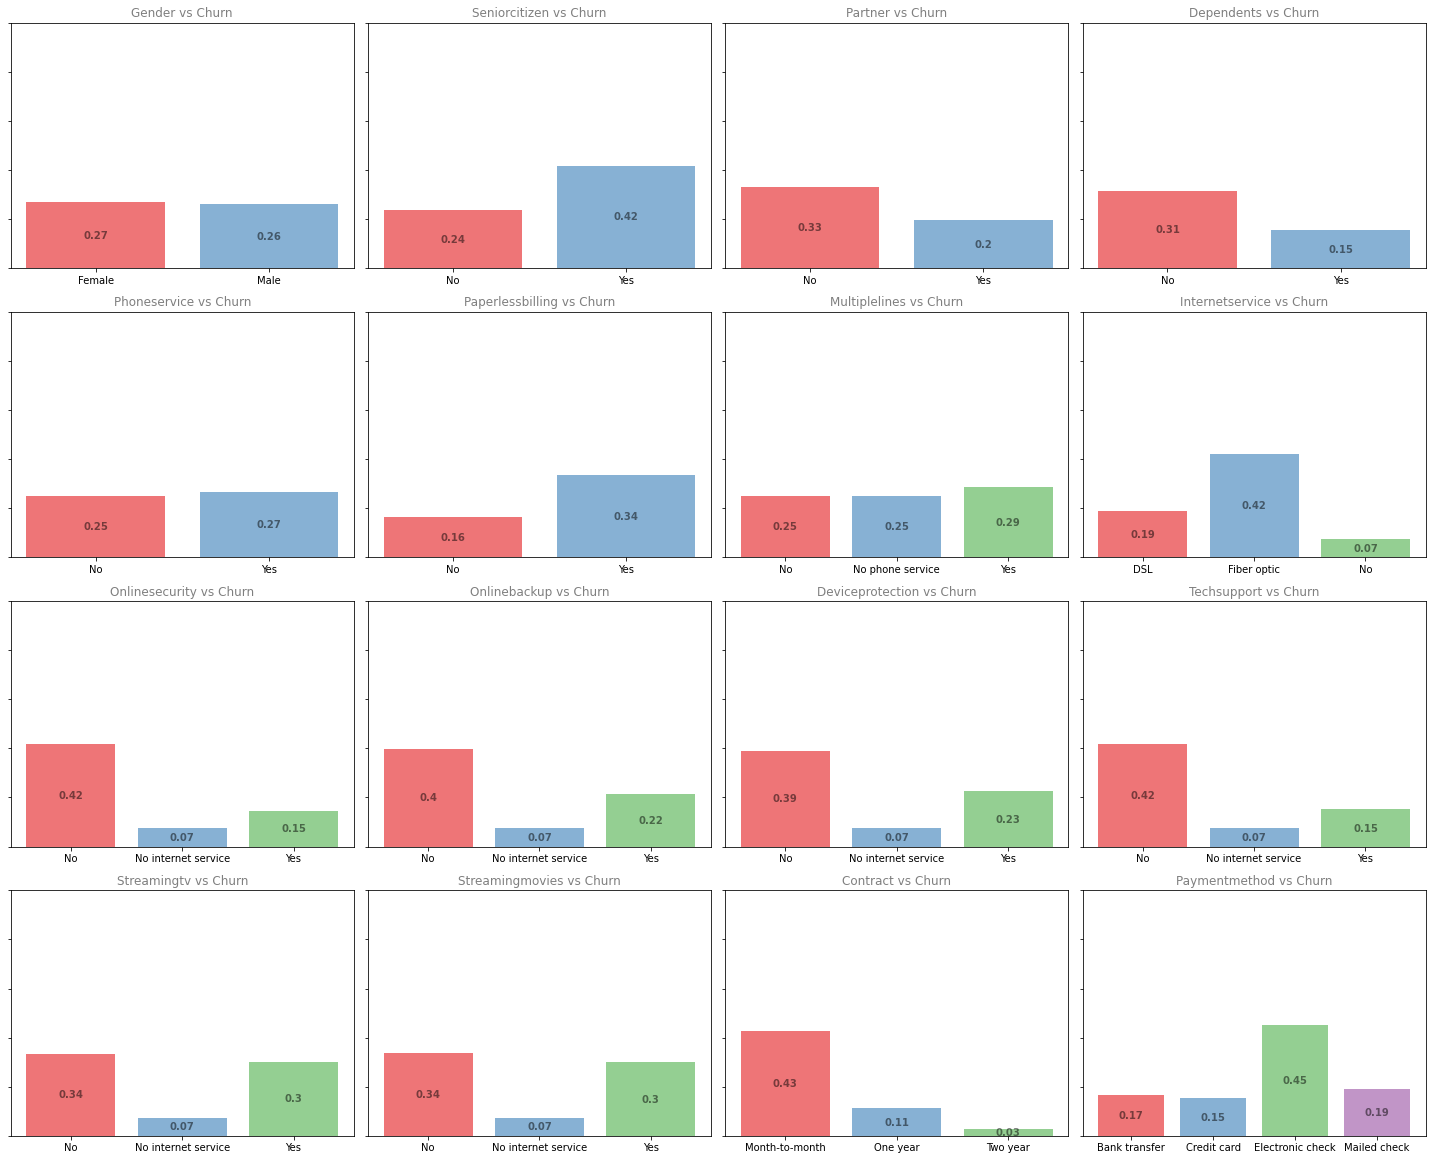

In [13]:
# Transforming the values in the Churn and SeniorCitizen columns
df.loc[df['Churn'] == 'No','Churn'] = 0 
df.loc[df['Churn'] == 'Yes','Churn'] = 1
df['Churn'] = df['Churn'].astype(int)
df.loc[df['SeniorCitizen'] == 0,'SeniorCitizen'] = 'No' 
df.loc[df['SeniorCitizen'] == 1,'SeniorCitizen'] = 'Yes'

# Creating the lists
binary = [col for col in df.columns if len(df[col].unique()) == 2 and col != 'Churn']
categorical = [col for col in df.columns if 2 < len(df[col].unique()) < 5]
bin_cat = binary + categorical

# Plotting
fig = plt.figure(figsize=(20,20))
    
for i in range(len(bin_cat)):
    churn_plot = df.groupby(bin_cat[i]).Churn.mean()
    ax = fig.add_subplot(5, 4, i+1)
    rects = ax.bar(churn_plot.index, churn_plot, color=sns.color_palette('Set1'), alpha=0.6)
    ax.grid(False)
    ax.set_ylim(0,1)
    ax.tick_params(labelleft=False)
    ax.set_title(f'{bin_cat[i].title()} vs Churn', alpha=0.5)
    
    for rect in (rects):
        height = rect.get_height()
        ax.text(x=rect.get_x() + rect.get_width() / 2, y=height * 0.5, s=round(height, 2), ha='center', va='center', alpha=0.5, fontweight='bold')

plt.tight_layout()
plt.show()

The factors that increase churn are: Customers without dependents, paperless billing, no online security, month-to-month contracts, electronic checks.
The factors that show less likely to churn are: no internet, yearly or two-year contracts.

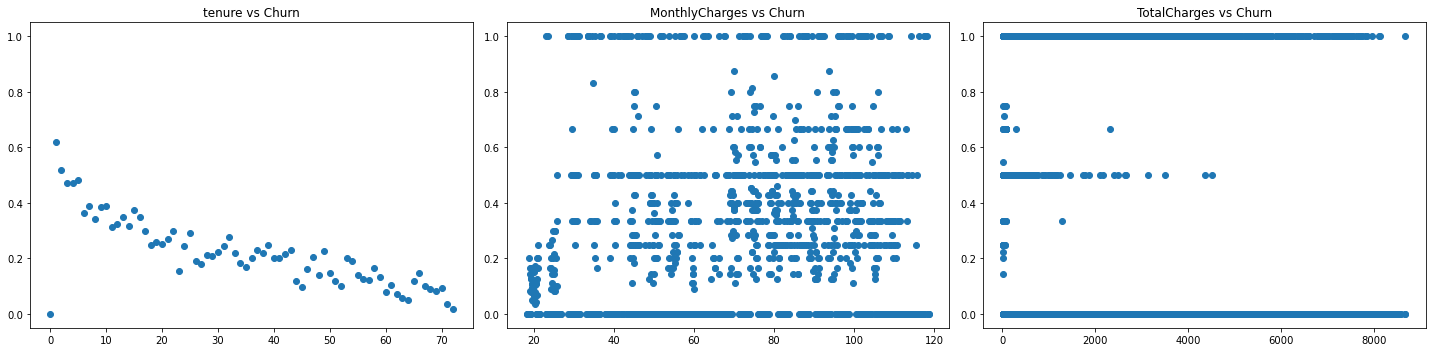

In [14]:
# Now lets look at numerical factors
numeric_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig = plt.figure(figsize=(20, 5))

for i in range(len(numeric_columns)):
    num_plot = df.groupby(numeric_columns[i]).Churn.mean()
    ax = fig.add_subplot(1, 3, i+1)
    ax.scatter(num_plot.index, num_plot)
    ax.set_title(f'{numeric_columns[i]} vs Churn')
    ax.set_ylim(-0.05, 1.05)

plt.tight_layout()
plt.show()

There is a significant correlation between tenure and churn. The higher the tenure the lower the likelihood of cancellation. 

## Now we are ready for preprocessing and modeling